In [52]:
# to handle datasets
import pandas as pd
import numpy as np

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


In [53]:
import os
os.chdir('C:\\Users\Dell\Downloads\datascience')

In [54]:
os.getcwd()

'C:\\Users\\Dell\\Downloads\\datascience'

In [55]:
data=pd.read_csv('train.csv')

In [56]:
print(data.head)
data.shape

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60

(1460, 81)

In [57]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [58]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [59]:
cata=[]
for var in data.columns:
    if data[var].dtype == 'O':
       print (var)
       cata.append(var)


MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [60]:
numerical=[var for var in data.columns if data[var].dtypes!='O']

In [61]:
print('there are total {} catagorical values'.format(len(cata)))

print('there are total {} catagorical values'.format(len(numerical)))

there are total 43 catagorical values
there are total 38 catagorical values


In [62]:
 discrete= [var for var in numerical if len(data[var].unique())<20]

In [63]:
for var in discrete:
    print(var,data[var].unique())

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
BsmtFullBath [1 0 2 3]
BsmtHalfBath [0 1 2]
FullBath [2 1 3 0]
HalfBath [1 0 2]
BedroomAbvGr [3 4 1 2 0 5 6 8]
KitchenAbvGr [1 2 3 0]
TotRmsAbvGrd [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces [0 1 2 3]
GarageCars [2 3 1 0 4]
PoolArea [  0 512 648 576 555 480 519 738]
MoSold [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold [2008 2007 2006 2009 2010]


In [64]:
#missing values
for var in data.columns:
    if data[var].isnull().sum()>0:
        print(var , data[var].isnull().mean())
    

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [65]:
#lots of missing values
for var in data.columns:
    if data[var].isnull().mean()>0.80:
        print(var , data[var].unique())
    


Alley [nan 'Grvl' 'Pave']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [66]:
continuos=[var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice']]
continuos

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

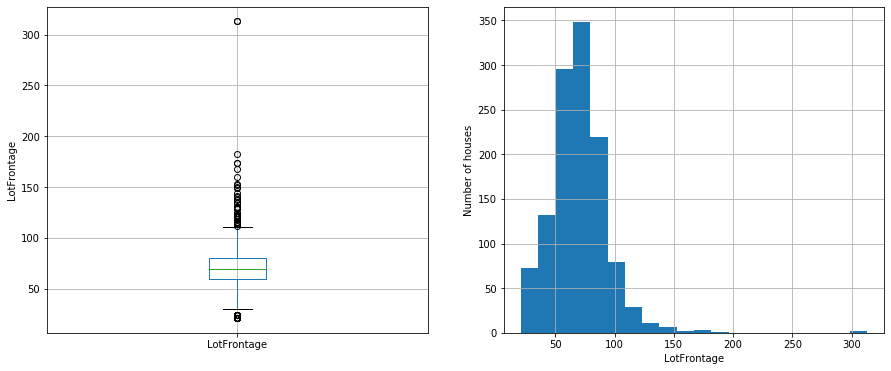

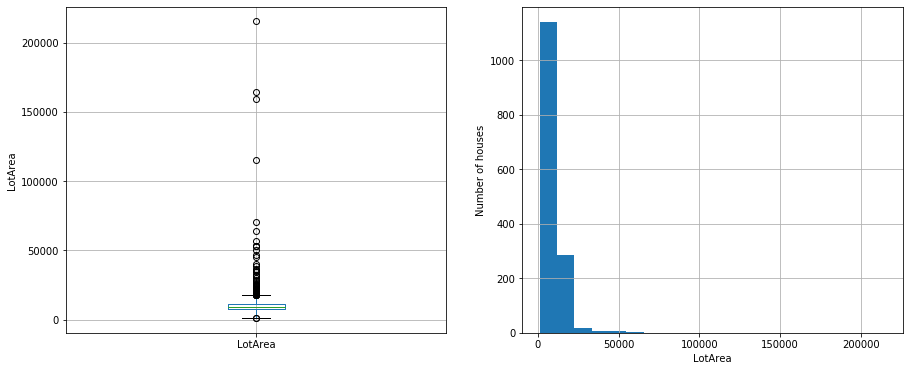

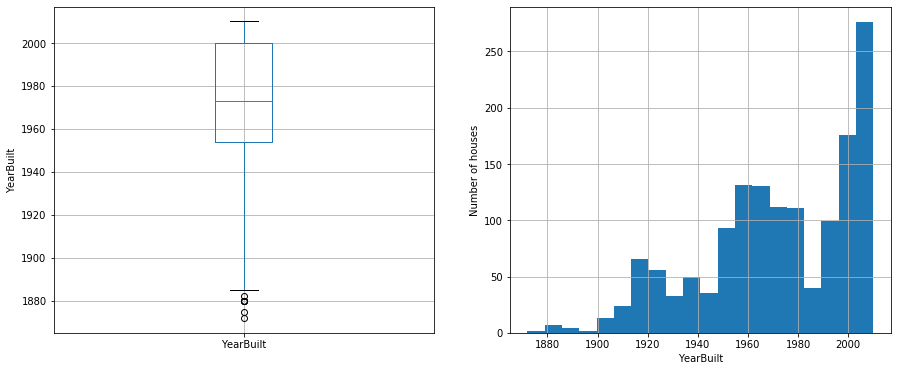

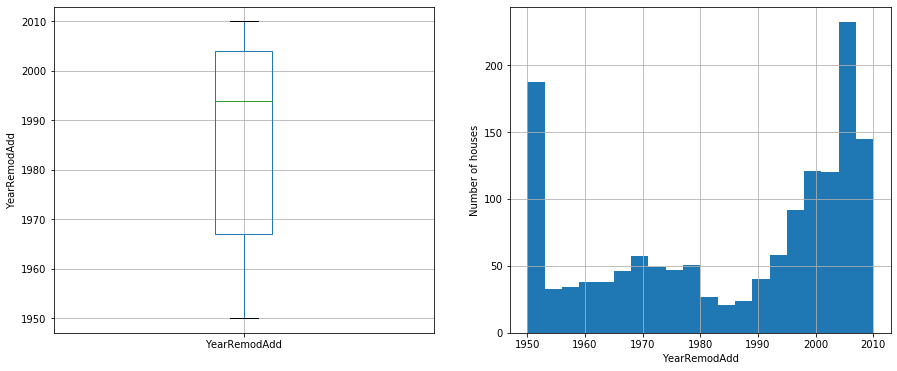

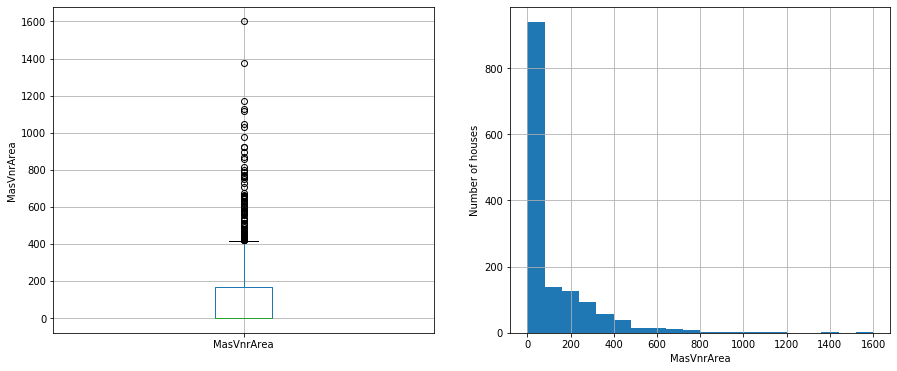

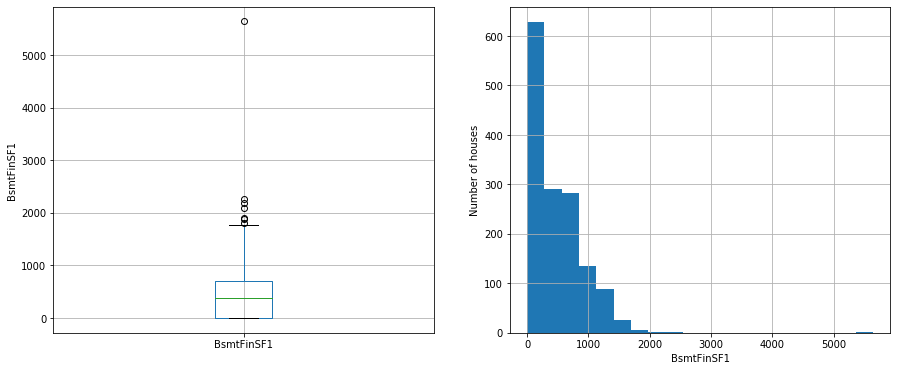

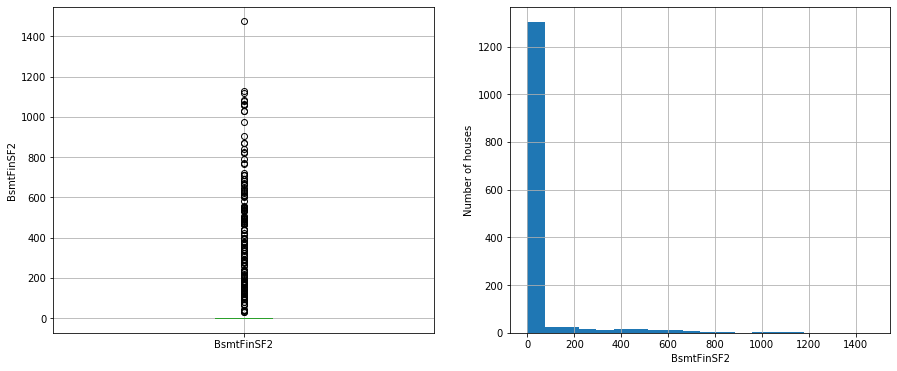

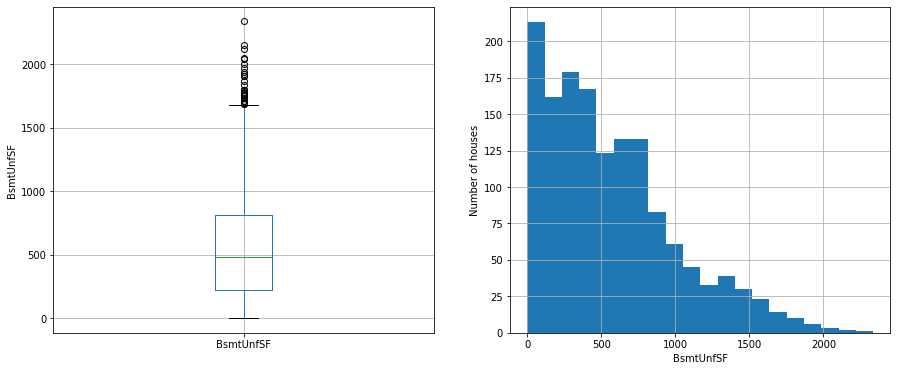

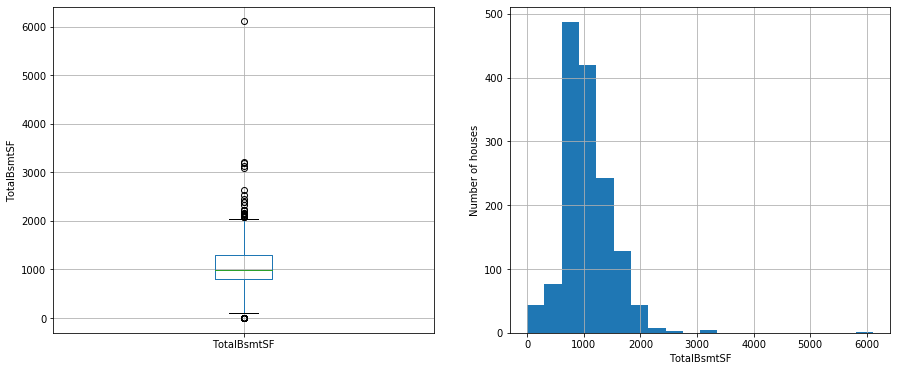

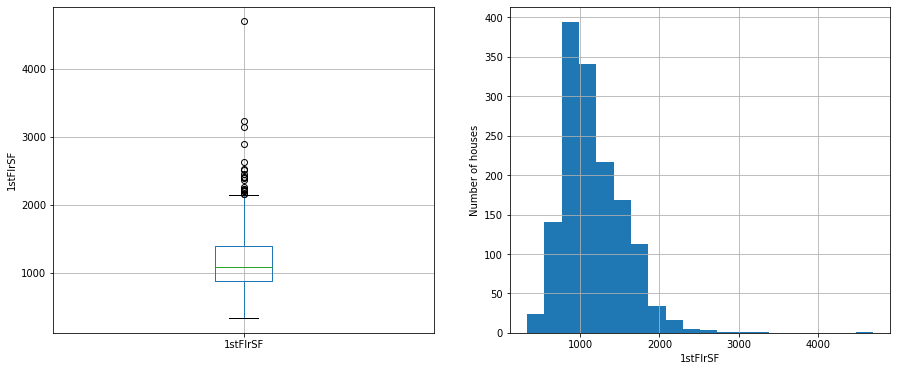

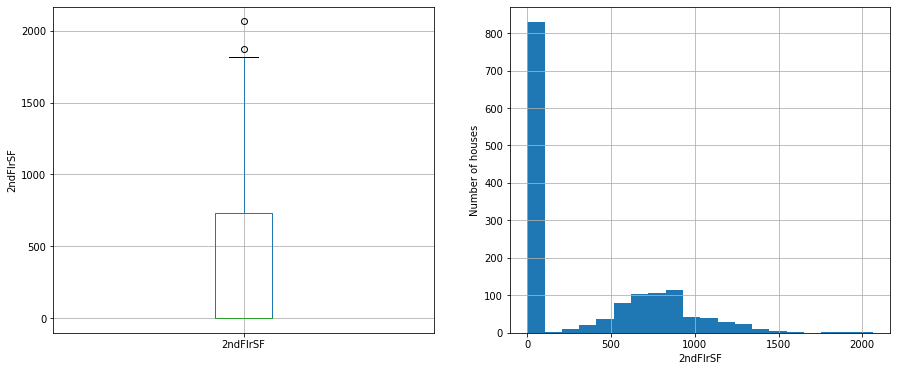

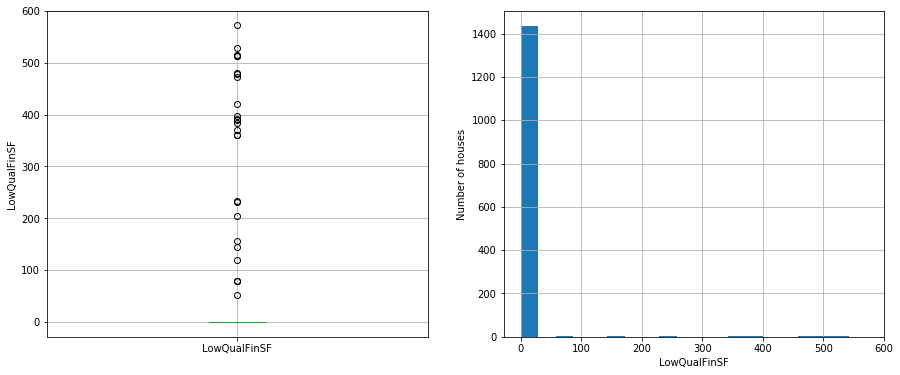

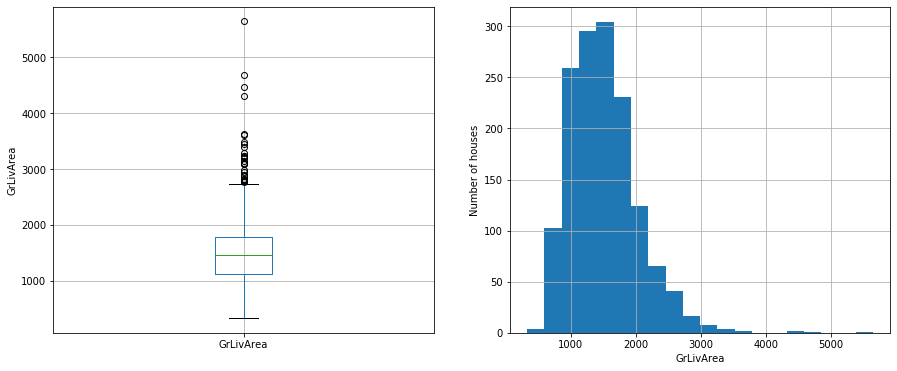

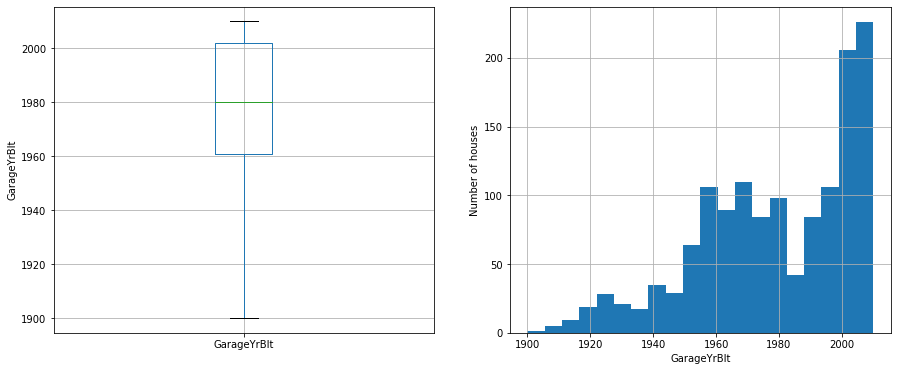

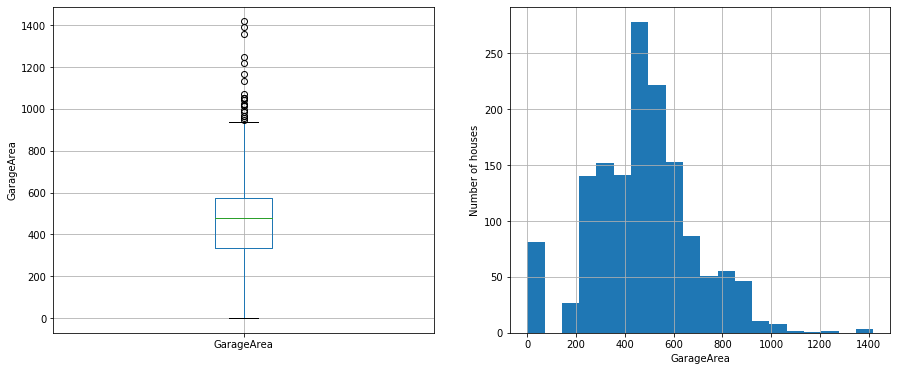

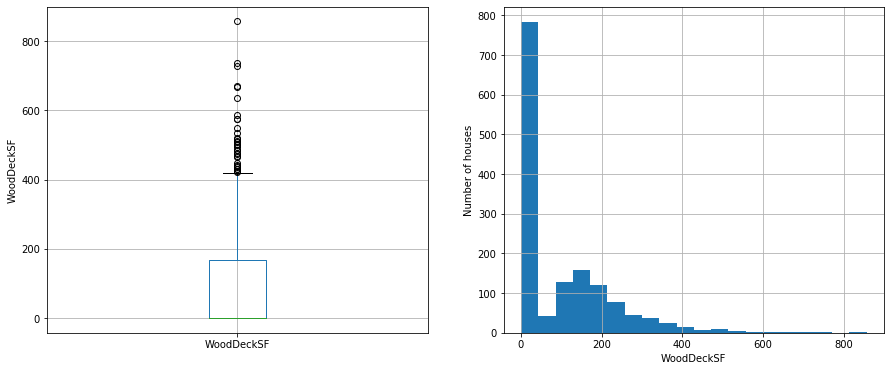

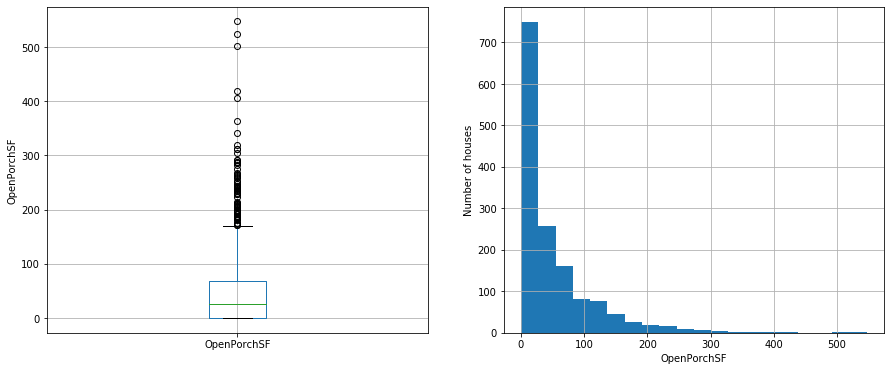

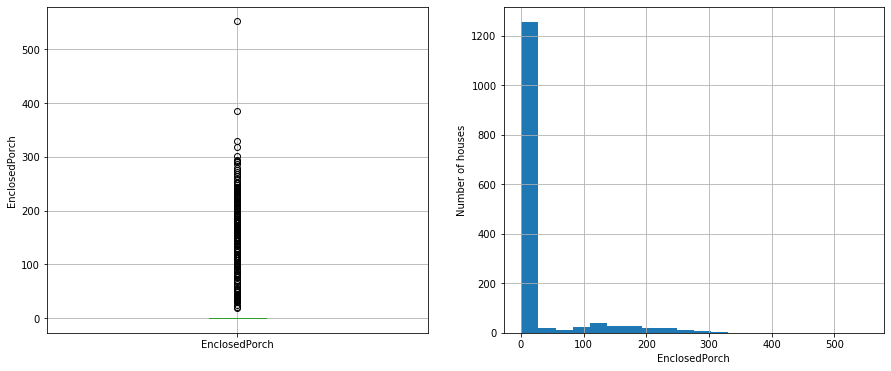

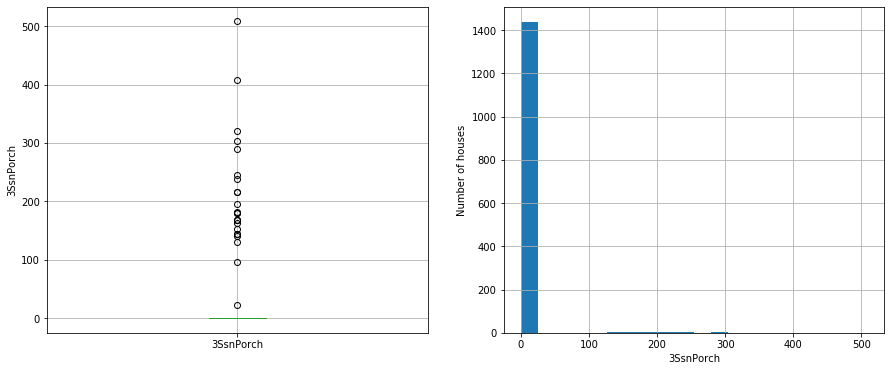

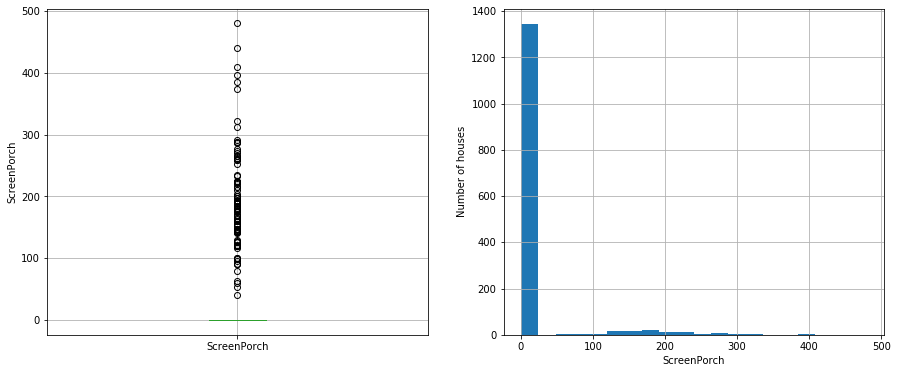

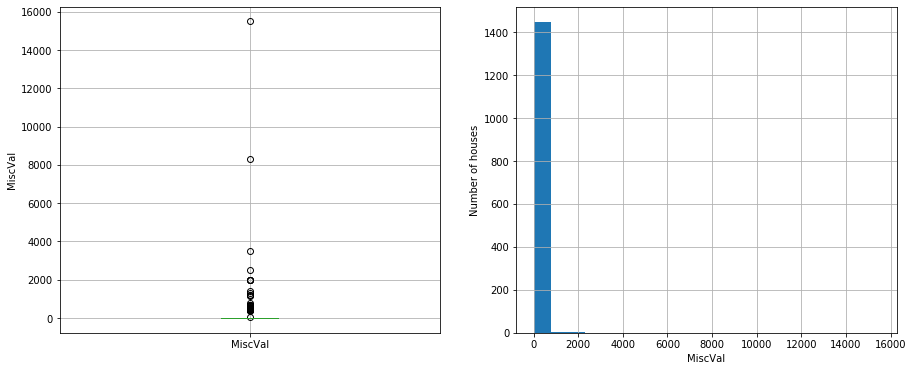

In [67]:
for var in continuos:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

In [68]:
#outiers in discere varible

for var in discrete:
    print(data[var].value_counts()/np.float(len(data[var])))

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64
0    0.586301
1    0.402740
2    0.010274
3    0.000685
Name: BsmtFullBath, dtype: float64
0    0.943836
1    0.054795
2    0.001370
Name: BsmtHalfBath, dtype: float64
2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: FullBath, dtype: float64
0    0.625342
1    0.366438
2    0.008219
Name: HalfBath, dtype: float64
3    0.550685
2    0.245205
4    0.145890
1    0.034247

In [69]:
#number of cardinality in catagorical variable.
for var in cata:
    print(var,len(data[var].unique()))


MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape,y_train.shape,y_test.shape

((1168, 81), (292, 81), (1168,), (292,))

In [202]:
#missing data in contineous
for var in continuos:
    if data[var].isnull().sum()>0:
        print(var,data[var].isnull().mean())
    

LotFrontage 0.1773972602739726
MasVnrArea 0.005479452054794521
GarageYrBlt 0.05547945205479452


In [203]:
#filling missing data in coninous
for df in [X_train, X_test]:
    for var in ['LotFrontage', 'GarageYrBlt']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
        df[var].fillna(X_train[var].median(), inplace=True) 

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [204]:
for df in [X_train,X_test]:
            df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
    

    

In [205]:
#check missing data in discrere
for df in [X_train,X_test]:
    for var in discrete:
        if df[var].isnull().sum()>0:
                    print(df[var].isnull().sum())
                
#there are no missing data in discere

In [206]:
#Missing Data in categorical variables 
for col in cata:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Alley 0.9392123287671232
MasVnrType 0.005136986301369863
BsmtQual 0.023972602739726026
BsmtCond 0.023972602739726026
BsmtExposure 0.023972602739726026
BsmtFinType1 0.023972602739726026
BsmtFinType2 0.02482876712328767
Electrical 0.0008561643835616438
FireplaceQu 0.4717465753424658
GarageType 0.04965753424657534
GarageFinish 0.04965753424657534
GarageQual 0.04965753424657534
GarageCond 0.04965753424657534
PoolQC 0.9965753424657534
Fence 0.8167808219178082
MiscFeature 0.9580479452054794


In [207]:
# add label indicating 'Missing' to categorical variables

for df in [X_train, X_test]:
    for var in cata:
        df[var].fillna('Missing', inplace=True)
        

In [208]:
#in order to tackle outliers and skewed distribution at the same time , we can do discretisation here , 
#And in order to find the optimal buckets automatically, I would use decision trees to find the buckets for me.
#Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of variable values
from sklearn.model_selection import cross_val_score

def tree_binariser(var):
    score_ls = [] # here I will store the mse

    for tree_depth in [1,2,3,4]:
        # call the model
        tree_model = DecisionTreeRegressor(max_depth=tree_depth)

        # train the model using 3 fold cross validation
        scores = cross_val_score(tree_model, X_train[var].to_frame(), y_train, cv=3, scoring='neg_mean_squared_error')
        score_ls.append(np.mean(scores))

    # find depth with smallest mse
    depth = [1,2,3,4][np.argmax(score_ls)]
    #print(score_ls, np.argmax(score_ls), depth)

    # transform the variable using the tree
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train[var].to_frame(), X_train.SalePrice)
    X_train[var] = tree_model.predict(X_train[var].to_frame())
    X_test[var] = tree_model.predict(X_test[var].to_frame())

In [209]:
from sklearn.tree import DecisionTreeRegressor
for var in continuos:
    tree_binariser(var)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [210]:
continuos1=df.copy(continuos)

In [211]:
len(continuos)

21

In [212]:
X_train[continuos].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
618,244774.580000,215854.852814,254712.211111,231942.797101,234430.248963,162693.417544,181949.470919,283420.571429,271695.020833,325504.423077,...,180556.807198,199700.782235,251948.409639,274927.700000,157482.765625,221545.352423,187096.857573,180269.684896,217936.589286,182034.509821
870,143409.933333,142922.191142,149604.171756,145548.741497,155275.997147,162693.417544,181949.470919,160164.021505,156267.219925,146426.575406,...,180556.807198,124728.476821,154389.937294,129813.178082,157482.765625,144015.982759,187096.857573,180269.684896,178939.159173,182034.509821
92,181337.643952,215854.852814,131510.402477,231942.797101,155275.997147,196331.633333,181949.470919,184078.475884,156267.219925,146426.575406,...,180556.807198,124728.476821,138503.159184,176900.146617,157482.765625,144015.982759,142394.476190,180269.684896,178939.159173,182034.509821
817,181337.643952,215854.852814,224159.198813,201707.040000,187711.507246,269568.187500,181949.470919,184078.475884,240148.982143,229591.006289,...,180556.807198,199700.782235,216624.805930,303610.295455,195914.158228,221545.352423,187096.857573,180269.684896,178939.159173,182034.509821
302,244774.580000,215854.852814,224159.198813,201707.040000,187711.507246,162693.417544,181949.470919,233388.564103,240148.982143,229591.006289,...,180556.807198,199700.782235,216624.805930,303610.295455,219441.075075,221545.352423,187096.857573,180269.684896,178939.159173,182034.509821


In [213]:
for var in continuos:
    print(var,len(X_train[var].unique()))

LotFrontage 4
LotArea 4
YearBuilt 8
YearRemodAdd 16
MasVnrArea 4
BsmtFinSF1 4
BsmtFinSF2 4
BsmtUnfSF 8
TotalBsmtSF 8
1stFlrSF 8
2ndFlrSF 14
LowQualFinSF 2
GrLivArea 8
GarageYrBlt 8
GarageArea 8
WoodDeckSF 4
OpenPorchSF 4
EnclosedPorch 6
3SsnPorch 4
ScreenPorch 2
MiscVal 2


In [214]:
#Engineering rare labels in categorical and discrete variables 
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')

In [215]:

# find infrequent labels in categorical variables
for var in cata:
    rare_imputation(var)


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [216]:
# let's check that it worked
for var in cata:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

MSZoning RL      0.788527
RM      0.148973
FV      0.041952
Rare    0.020548
Name: MSZoning, dtype: float64

Street Pave    0.995719
Rare    0.004281
Name: Street, dtype: float64

Alley Missing    0.939212
Grvl       0.031678
Rare       0.029110
Name: Alley, dtype: float64

LotShape Reg     0.629281
IR1     0.339041
Rare    0.031678
Name: LotShape, dtype: float64

LandContour Lvl     0.902397
Rare    0.054795
Bnk     0.042808
Name: LandContour, dtype: float64

Utilities AllPub    0.999144
Rare      0.000856
Name: Utilities, dtype: float64

LotConfig Inside     0.727740
Corner     0.175514
CulDSac    0.065068
FR2        0.030822
Rare       0.000856
Name: LotConfig, dtype: float64

LandSlope Gtl     0.941781
Mod     0.047089
Rare    0.011130
Name: LandSlope, dtype: float64

Neighborhood Rare       0.186644
NAmes      0.151541
CollgCr    0.099315
OldTown    0.076199
Edwards    0.068493
Somerst    0.058219
Sawyer     0.055651
Gilbert    0.054795
NridgHt    0.052226
NWAmes     0.047945
BrkS

In [217]:
#Encode categorical and discrete variables 
def encode_categorical_variables(var, target):
        # make label to price dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
       

# encode labels in categorical vars
for var in cata:
    encode_categorical_variables(var, 'SalePrice')
    
# encode labels in discrete vars
for var in discrete:
    encode_categorical_variables(var, 'SalePrice')

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [227]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
618,619,184802.941860,191112.542888,244774.580000,215854.852814,181009.158212,183253.524157,164502.708844,180625.987666,180846.010283,...,187571.216981,182078.329759,182034.509821,183938.518519,187530.407692,280094.270833,278236.510204,314813,0,0
870,871,184802.941860,191112.542888,143409.933333,142922.191142,181009.158212,183253.524157,164502.708844,180625.987666,180846.010283,...,187571.216981,182078.329759,182034.509821,185801.122222,177176.490421,172945.844946,174634.731682,109500,0,0
92,93,96493.392857,191112.542888,181337.643952,215854.852814,181009.158212,121154.162162,205860.732323,214412.765625,180846.010283,...,187571.216981,182078.329759,182034.509821,185801.122222,177176.490421,172945.844946,174634.731682,163500,0,0
817,818,184802.941860,191112.542888,181337.643952,215854.852814,181009.158212,183253.524157,205860.732323,180625.987666,180846.010283,...,187571.216981,182078.329759,182034.509821,183938.518519,179548.348178,172945.844946,174634.731682,271000,1,0
302,303,184802.941860,191112.542888,244774.580000,215854.852814,181009.158212,183253.524157,205860.732323,180625.987666,180846.010283,...,187571.216981,182078.329759,182034.509821,185865.387755,182698.573123,172945.844946,174634.731682,205000,0,0


We can see that the labels have now been replaced by the mean house price.



In [228]:
#Feature scaling 
X_train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,738.685788,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,...,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,180808.898973,0.181507,0.049658
std,421.609683,39401.016054,25720.477372,33736.046396,37115.680039,3055.507893,11140.998208,21889.220846,11298.306442,1268.316692,...,16127.286579,6184.091203,5922.798839,7697.828418,4423.740972,30036.572861,30678.760855,78499.911304,0.385603,0.217329
min,1.000000,96493.392857,107592.250000,143409.933333,142922.191142,134228.600000,121154.162162,164502.708844,141651.720000,137500.000000,...,137735.714286,132375.000000,152211.312500,171289.927536,174235.666667,152149.584906,141668.848101,34900.000000,0.000000,0.000000
25%,373.750000,142492.417391,191112.542888,143409.933333,142922.191142,181009.158212,183253.524157,164502.708844,180625.987666,180846.010283,...,187571.216981,182078.329759,182034.509821,172689.617647,177176.490421,172945.844946,174634.731682,130000.000000,0.000000,0.000000
50%,749.500000,184802.941860,191112.542888,181337.643952,176590.069705,181009.158212,183253.524157,164502.708844,180625.987666,180846.010283,...,187571.216981,182078.329759,182034.509821,177840.066667,179548.348178,172945.844946,174634.731682,163000.000000,0.000000,0.000000
75%,1108.750000,195744.558824,191112.542888,181337.643952,215854.852814,181009.158212,183253.524157,205860.732323,180625.987666,180846.010283,...,187571.216981,182078.329759,182034.509821,185865.387755,182698.573123,172945.844946,174634.731682,215000.000000,0.000000,0.000000
max,1460.000000,239938.773663,212604.693878,244774.580000,252893.385185,181009.158212,183253.524157,236606.837838,214412.765625,180846.010283,...,187571.216981,182078.329759,182034.509821,199738.489796,187530.407692,280094.270833,278236.510204,755000.000000,1.000000,1.000000


In [229]:
training_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]


In [230]:
# fit scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set for later use

StandardScaler(copy=True, with_mean=True, with_std=True)

In [231]:
#Machine learning algoritham.
from sklearn.metrics import roc_auc_score
from sklearn import metrics


In [232]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgb_model = xgb.XGBRegressor()

eval_set = [(X_test[training_vars], y_test)]
xgb_model.fit(X_train[training_vars], y_train, eval_set=eval_set, verbose=False)

pred = xgb_model.predict(X_train[training_vars])
print('xgb train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = xgb_model.predict(X_test[training_vars])
print('xgb test mse: {}'.format(mean_squared_error(y_test, pred)))

C:\Users\Dell\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:57:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb train mse: 234946100.19141355
xgb test mse: 730570493.5737113


In [233]:
import xgboost as xgb
from xgboost import XGBClassifier
X_test['PoolArea'].fillna(X_test[var].median(), inplace=True) 


C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [234]:
#random forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train[training_vars], y_train)

pred = rf_model.predict(X_train[training_vars])
print('rf train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = rf_model.predict(X_test[training_vars])
print('rf test mse: {}'.format(mean_squared_error(y_test, pred)))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rf train mse: 169019790.05301374
rf test mse: 1112017612.59911


In [235]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train[training_vars], y_train)

pred = rf_model.predict(X_train[training_vars])
print('rf train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = rf_model.predict(X_test[training_vars])
print('rf test mse: {}'.format(mean_squared_error(y_test, pred)))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rf train mse: 170091839.09320205
rf test mse: 1408663049.5382874


In [236]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train[training_vars], y_train)

pred = rf_model.predict(X_train[training_vars])
print('rf train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = rf_model.predict(X_test[training_vars])
print('rf test mse: {}'.format(mean_squared_error(y_test, pred)))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rf train mse: 165053874.51659247
rf test mse: 1006001370.4759932


In [240]:
#support vector machine
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

SVR_model = SVR()
SVR_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = SVR_model.predict(scaler.transform(X_train[training_vars]))
print('SVR train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = SVR_model.predict(scaler.transform(X_test[training_vars]))
print('SVR test mse: {}'.format(mean_squared_error(y_test, pred)))

SVR train mse: 6467104202.850991
SVR test mse: 7236889249.982256
